<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Magíster en Data Science</em><br>
    <em>Profesor: Tomás Fontecilla </em><br>

</div>

# Machine Learning
*12 de Octubre de 2024*

**Nombre Estudiante(s)**: `Giuseppe Lavarello - Víctor Saldivia - Ingrid Solís - Cristian Tobar`  

In [1]:
#Es probable que no les corra a la primera, yo tube que instalar/actualizar estos paquetes

#%pip install ucimlrepo
#%pip install xgboost
#%pip install --upgrade scikit-learn
#%pip install --upgrade imbalanced-learn

In [2]:

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo 
import missingno as msng

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.utils import class_weight

from imblearn.over_sampling import ADASYN

from xgboost import XGBClassifier

sns.set_theme()
pd.set_option('display.max_columns', None)

In [3]:

  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  
# metadata 
print(cdc_diabetes_health_indicators.metadata) 
  
# variable information 
print(cdc_diabetes_health_indicators.variables) 



{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [4]:
df0=pd.concat([y,X], axis=1)

In [5]:
# Mostrar las primeras 10 filas de los datos

df0.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4
5,0,1,1,1,25,1,0,0,1,1,1,0,1,0,2,0,2,0,1,10,6,8
6,0,1,0,1,30,1,0,0,0,0,0,0,1,0,3,0,14,0,0,9,6,7
7,0,1,1,1,25,1,0,0,1,0,1,0,1,0,3,0,0,1,0,11,4,4
8,1,1,1,1,30,1,0,1,0,1,1,0,1,0,5,30,30,1,0,9,5,1
9,0,0,0,1,24,0,0,0,0,0,1,0,1,0,2,0,0,0,1,8,4,3


In [6]:
# Recopilación de información básica sobre el conjunto de datos
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [7]:
# Notar que estan todas las Features consideradas como Int. Se cambia a Bool donde corresponda

binary_features = {
    "Diabetes_binary": bool,
    "HighBP": bool,
    "HighChol": bool,
    "CholCheck": bool,
    "Smoker": bool,
    "Stroke": bool,
    "HeartDiseaseorAttack": bool,
    "PhysActivity": bool,
    "Fruits": bool,
    "Veggies": bool,
    "HvyAlcoholConsump": bool,
    "AnyHealthcare": bool,
    "NoDocbcCost": bool,
    "DiffWalk": bool,
    "Sex": bool,
}
df0 = df0.astype(binary_features)

In [8]:
# Recopilación de estadísticas descriptivas sobre los datos
df0.describe()

,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,28.382364,2.511392,3.184772,4.242081,8.032119,5.050434,6.053875
std,6.608694,1.068477,7.412847,8.717951,3.054220,0.985774,2.071148
min,12.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,24.000000,2.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,27.000000,2.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,31.000000,3.000000,2.000000,3.000000,10.000000,6.000000,8.000000
max,98.000000,5.000000,30.000000,30.000000,13.000000,6.000000,8.000000


In [9]:
# Mostrar el tamaño del DataFrame
df0.shape

(253680, 22)

<Axes: >

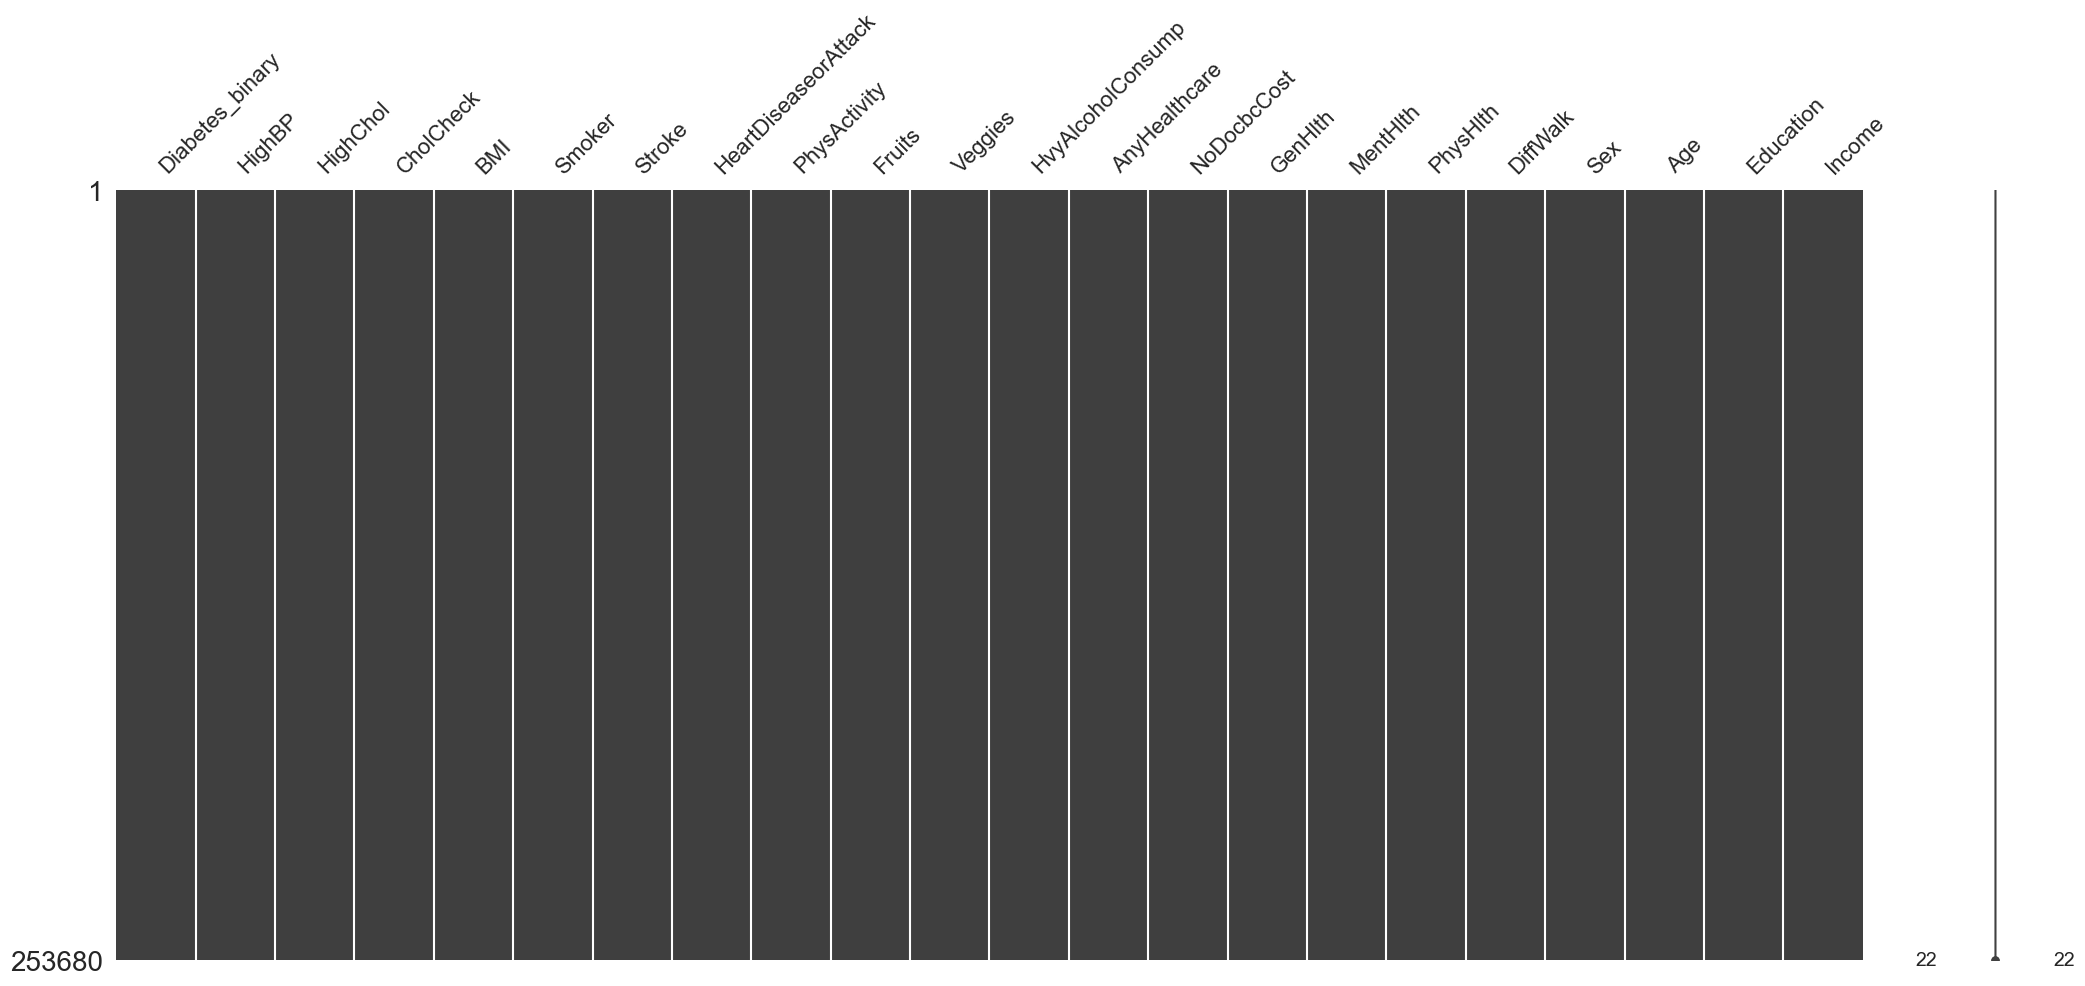

In [10]:
# Chequeo visual de Nans
msng.matrix(df0)

In [11]:
# Chequeo por dupes
duplicados = df0.duplicated().sum()

# Porcentage de dupes
porcentage = df0.duplicated().sum() / X.shape[0] * 100

print(f'{duplicados} filas contienen duplicados, lo que representa el {porcentage.round(2)}% del total de los datos.')


24206 filas contienen duplicados, lo que representa el 9.54% del total de los datos.


In [12]:
# Eliminar duplicados y guardar el dataframe resultante en una nueva variable
df1 = df0.drop_duplicates(keep='first')

df1.shape

(229474, 22)

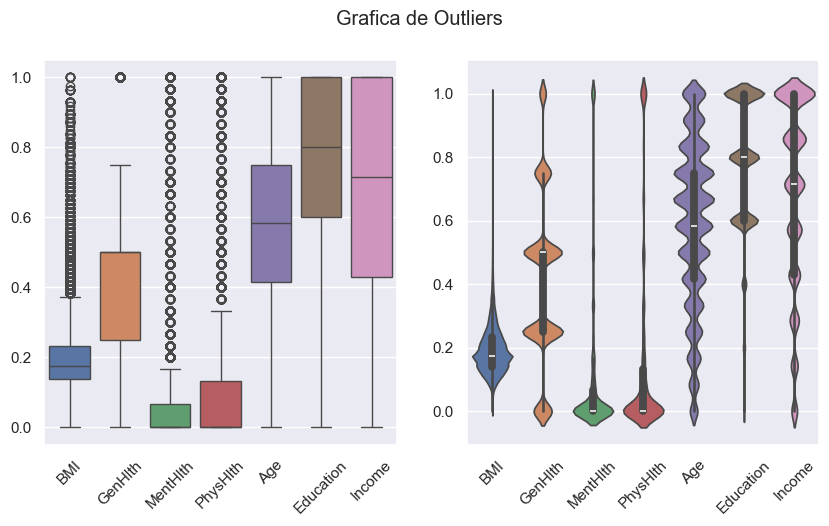

In [13]:
# Crear un boxplot para visualizar la distribución de todas las variables numéricas y detectar posibles valores atípicos
fig, axs= plt.subplots(1, 2, figsize=(10,5))
# seleccionar columnas numéricas
num_columns = df1.select_dtypes(include=['number'])

# normalizar los valores usando escalado Min-Max
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(num_columns)

# Crear un dataframe con los datos normalizados
df_normalized = pd.DataFrame(normalized_data, columns=num_columns.columns)
sns.boxplot(data= df_normalized, ax=axs[0])
sns.violinplot(data= df_normalized, ax=axs[1])

axs[0].tick_params(axis='x', rotation=45)
axs[1].tick_params(axis='x', rotation=45)

fig.suptitle('Grafica de Outliers')
plt.show()


In [14]:
# Bucle para recorrer cada columna numérica y detectar y contar valores atípicos
out_cols=['BMI', 'GenHlth', 'MentHlth', 'PhysHlth']
upperlim = {}
for column in out_cols:
    print(f"Procesando columna: {column}")
    
    # Calcular el valor del percentil 25
    percentil25 = df1[column].quantile(0.25)
    
    # Calcular el valor del percentil 75
    percentil75 = df1[column].quantile(0.75)
    
    # Calcular el rango intercuartil (IQR)
    iqr = percentil75 - percentil25
    
    # Definir los límites superior e inferior para los valores no atípicos
    límite_superior = percentil75 + 1.5 * iqr
    límite_inferior = percentil25 - 1.5 * iqr
    upperlim[column] = límite_superior
    
    print(f"Límite inferior para {column}:", límite_inferior)
    print(f"Límite superior para {column}:", límite_superior)
    
    # Identificar los valores atípicos en la columna actual
    valores_atípicos = df1[(df1[column] > límite_superior) | (df1[column] < límite_inferior)]
    
    # Contar el número de filas con valores atípicos
    print(f"Número de filas que contienen valores atípicos en {column}: {len(valores_atípicos)}\n")


Procesando columna: BMI
Límite inferior para BMI: 12.0
Límite superior para BMI: 44.0
Número de filas que contienen valores atípicos en BMI: 5638

Procesando columna: GenHlth
Límite inferior para GenHlth: 0.5
Límite superior para GenHlth: 4.5
Número de filas que contienen valores atípicos en GenHlth: 12078

Procesando columna: MentHlth
Límite inferior para MentHlth: -3.0
Límite superior para MentHlth: 5.0
Número de filas que contienen valores atípicos en MentHlth: 36162

Procesando columna: PhysHlth
Límite inferior para PhysHlth: -6.0
Límite superior para PhysHlth: 10.0
Número de filas que contienen valores atípicos en PhysHlth: 34346



**Desición** Basandonos en las figuras y las cantidades se descartara los outliers en BMI, MenHlth y PhysHlth, manteniendo los valores de GenHlth, pues se comportan de manera Normal

In [15]:
# usar una máscara booleana para eliminar valores atípicos
mask = True
for column, upper_limit in upperlim.items():
    if column == 'GenHelth': continue
    mask &= (df1[column] <= upper_limit)
df2 = df1[mask].copy()


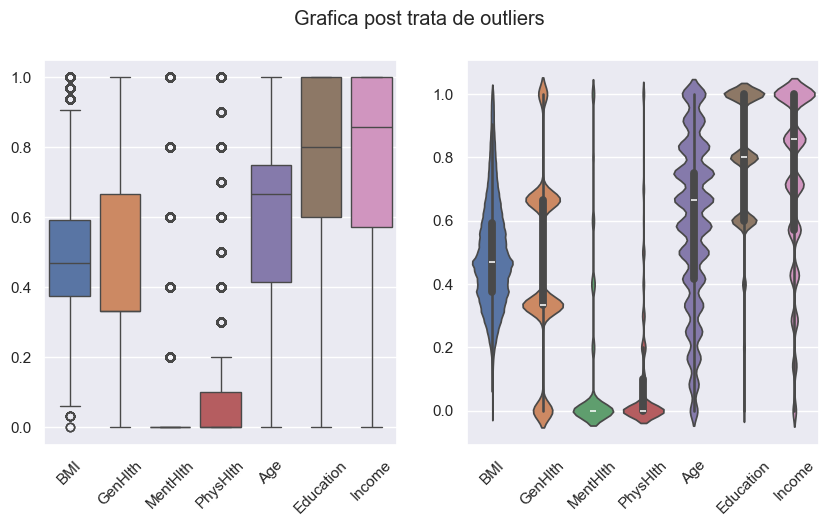

In [16]:
# Crear un boxplot para visualizar la distribución de todas las variables numéricas y detectar posibles valores atípicos
fig, axs= plt.subplots(1, 2, figsize=(10,5))
# seleccionar columnas numéricas
num_columns = df2.select_dtypes(include=['number'])

# normalizar los valores usando escalado Min-Max
scaler = MinMaxScaler()
normalized_data2 = scaler.fit_transform(num_columns)

# Crear un dataframe con los datos normalizados
df_normalized2 = pd.DataFrame(normalized_data2, columns=num_columns.columns)
sns.boxplot(data= df_normalized2, ax=axs[0])
sns.violinplot(data= df_normalized2, ax=axs[1])

axs[0].tick_params(axis='x', rotation=45)
axs[1].tick_params(axis='x', rotation=45)

fig.suptitle('Grafica post trata de outliers')
plt.show()

## separacion de los datos

In [17]:
# Preparar características (X) y la variable objetivo (y)
X = df2.drop('Diabetes_binary', axis=1) 
y = df2['Diabetes_binary']


# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5555)

#Como existe un gran desbalance entre la incidencia de las clases tenemos que rebalancear
# ada = ADASYN(random_state=5555)
# X_train, y_train = ada.fit_resample(X_train, y_train)

## Regresión Logistica

In [18]:
def plt_conf_matrix(y_test,y_pred):
    # Calcular la matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Graficar la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Matriz de Confusión')
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.show()

              precision    recall  f1-score   support

       False       0.95      0.71      0.81     29439
        True       0.27      0.76      0.40      4249

    accuracy                           0.71     33688
   macro avg       0.61      0.73      0.61     33688
weighted avg       0.87      0.71      0.76     33688



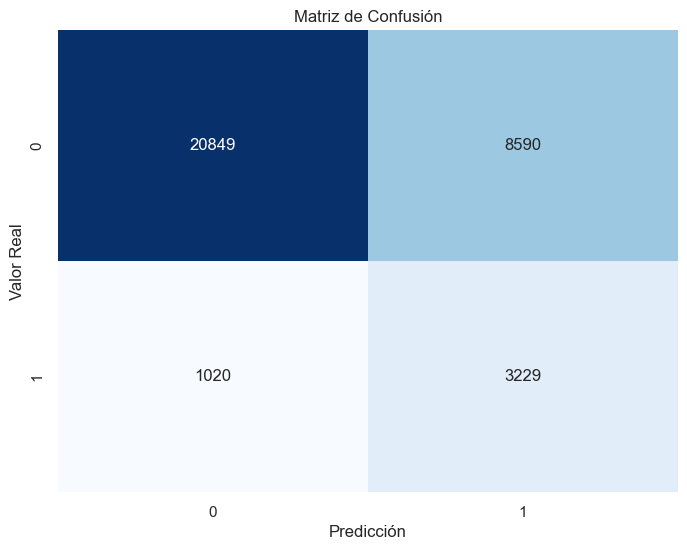

In [19]:
# Crear y ajustar el modelo de Regresión Logística
logreg_model = LogisticRegression(random_state=5555, max_iter=1000, class_weight='balanced')  # Aumentar max_iter si es necesario
logreg_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_logreg = logreg_model.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred_logreg))

plt_conf_matrix(y_test,y_pred_logreg)




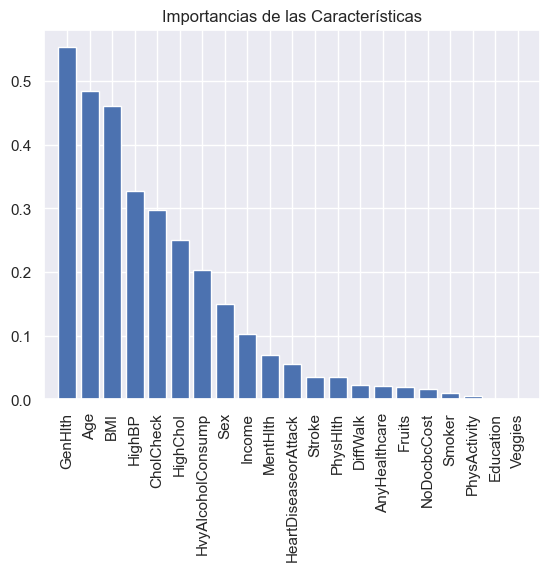

In [20]:
# Importancias de las características
importances_reglog = np.array(np.abs(logreg_model.coef_[0])*X.std()) #Valor del coeficiente de cada variable, ponderado por la variación standard para mostrar el efecto "real"
indices = np.argsort(importances_reglog)[::-1]

# Graficar las importancias de las características
plt.figure()
plt.title('Importancias de las Características')
plt.bar(range(X.shape[1]), importances_reglog[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(X.columns)[indices],rotation=90,)
plt.xlim([-1, X.shape[1]])
plt.show()

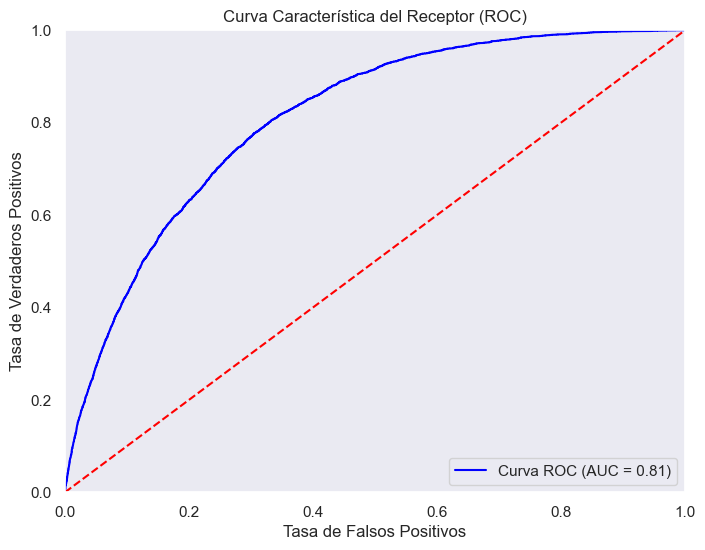

In [21]:

# Obtener las probabilidades predichas para la clase positiva
y_probs_logreg = logreg_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs_logreg)

# Calcular el AUC
roc_auc = roc_auc_score(y_test, y_probs_logreg)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva Característica del Receptor (ROC)')
plt.legend(loc='lower right')
plt.grid()

plt.show()

## Arboles de Decision

              precision    recall  f1-score   support

       False       0.95      0.67      0.78     29439
        True       0.25      0.78      0.38      4249

    accuracy                           0.68     33688
   macro avg       0.60      0.72      0.58     33688
weighted avg       0.87      0.68      0.73     33688



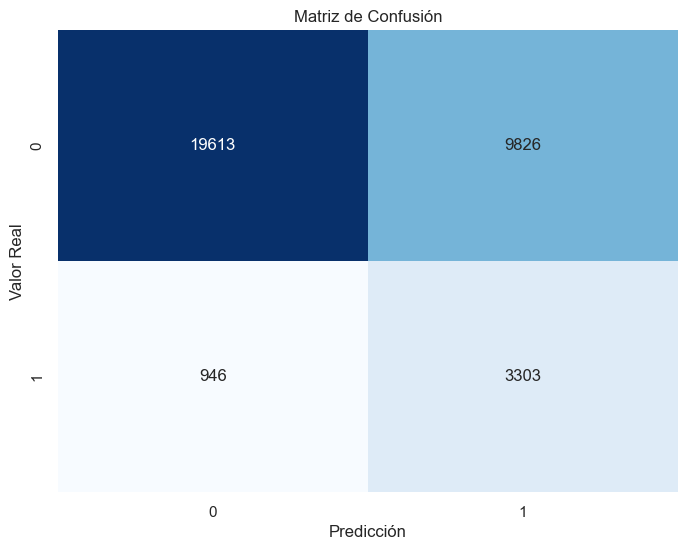

In [22]:
# Crear y ajustar el árbol de desición
arbol = DecisionTreeClassifier(random_state=5555, max_depth= 10, class_weight='balanced')
arbol.fit(X_train,y_train)

# Hacer predicciones
y_preds_arbol = arbol.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_preds_arbol))

plt_conf_matrix(y_test,y_preds_arbol)




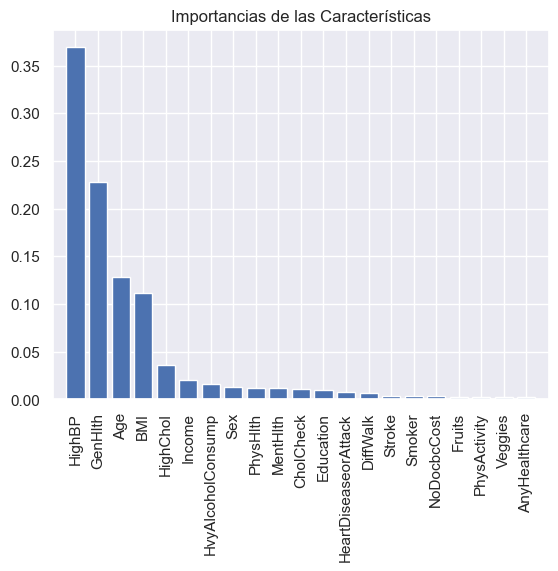

In [23]:
# Importancias de las características
importances_dtree = arbol.feature_importances_
indices = np.argsort(importances_dtree)[::-1]

# Graficar las importancias de las características
plt.figure()
plt.title('Importancias de las Características')
plt.bar(range(X.shape[1]), importances_dtree[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(X.columns)[indices],rotation=90,)
plt.xlim([-1, X.shape[1]])
plt.show()

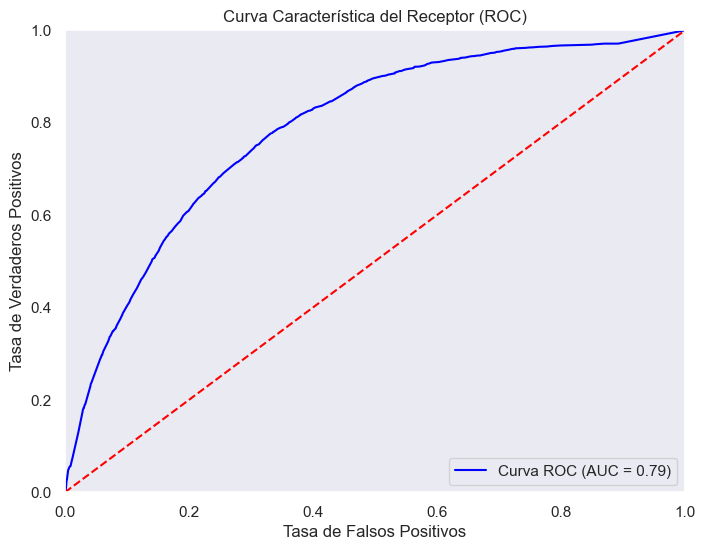

In [24]:

# Obtener las probabilidades predichas para la clase positiva
y_probs_arbol = arbol.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs_arbol)

# Calcular el AUC
roc_auc = roc_auc_score(y_test, y_probs_arbol)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva Característica del Receptor (ROC)')
plt.legend(loc='lower right')
plt.grid()

plt.show()

## RndForest


              precision    recall  f1-score   support

       False       0.95      0.71      0.81     29439
        True       0.27      0.76      0.40      4249

    accuracy                           0.71     33688
   macro avg       0.61      0.73      0.61     33688
weighted avg       0.87      0.71      0.76     33688



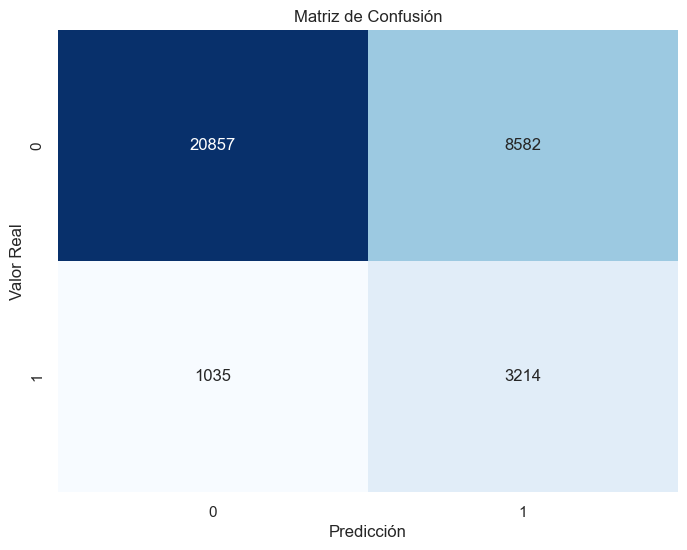

In [25]:
# Crear y ajustar el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10 ,random_state=5555, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_rndforest = rf_model.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred_rndforest))

plt_conf_matrix(y_test,y_pred_rndforest)




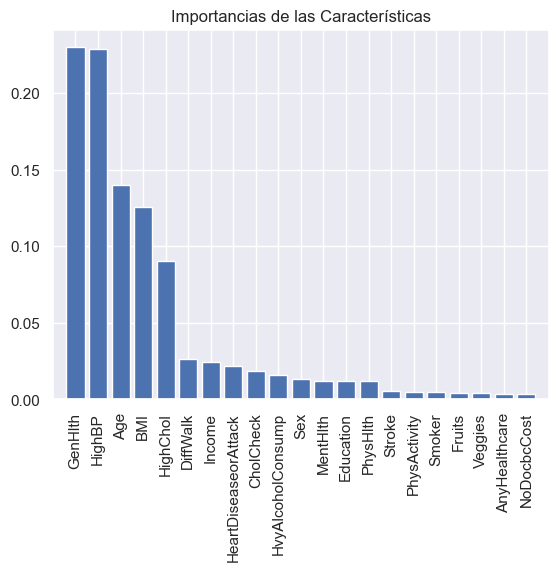

In [26]:
# Importancias de las características
importances_rf = rf_model.feature_importances_
indices = np.argsort(importances_rf)[::-1]

# Graficar las importancias de las características
plt.figure()
plt.title('Importancias de las Características')
plt.bar(range(X.shape[1]), importances_rf[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(X.columns)[indices],rotation=90,)
plt.xlim([-1, X.shape[1]])
plt.show()

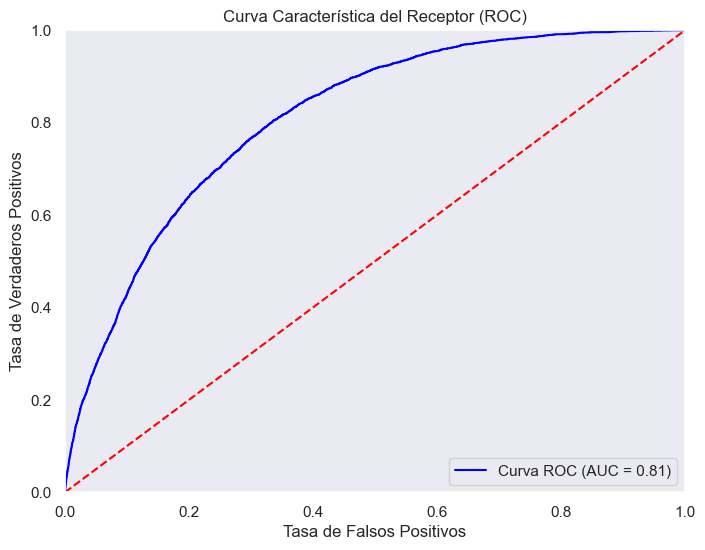

In [27]:
# Obtener las probabilidades predichas para la clase positiva
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calcular el AUC
roc_auc = roc_auc_score(y_test, y_probs)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva Característica del Receptor (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## AdaBoost

              precision    recall  f1-score   support

       False       0.95      0.71      0.81     29439
        True       0.27      0.76      0.40      4249

    accuracy                           0.71     33688
   macro avg       0.61      0.73      0.61     33688
weighted avg       0.87      0.71      0.76     33688



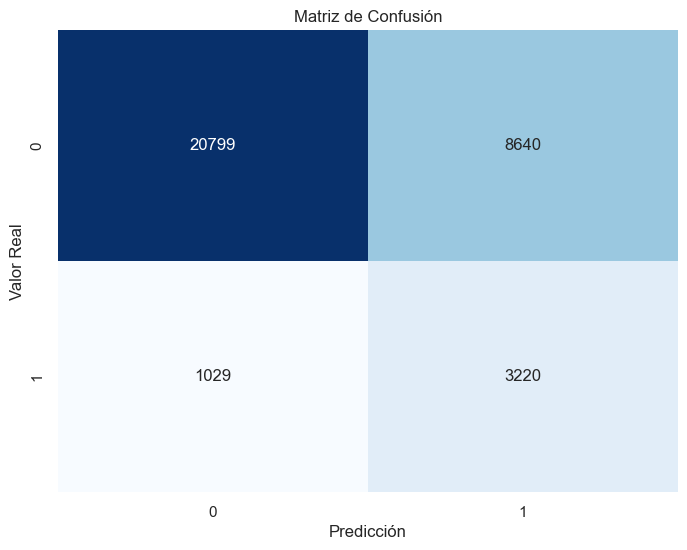

In [28]:

# Calcular pesos de clase
class_weights = class_weight.compute_sample_weight('balanced', y_train)

# Crear y ajustar el modelo de AdaBoost
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=5555, algorithm='SAMME')
adaboost_model.fit(X_train, y_train, sample_weight=class_weights)


# Hacer predicciones
y_pred_adaboost = adaboost_model.predict(X_test)


# Evaluar el modelo
print(classification_report(y_test, y_pred_adaboost))

plt_conf_matrix(y_test,y_pred_adaboost)

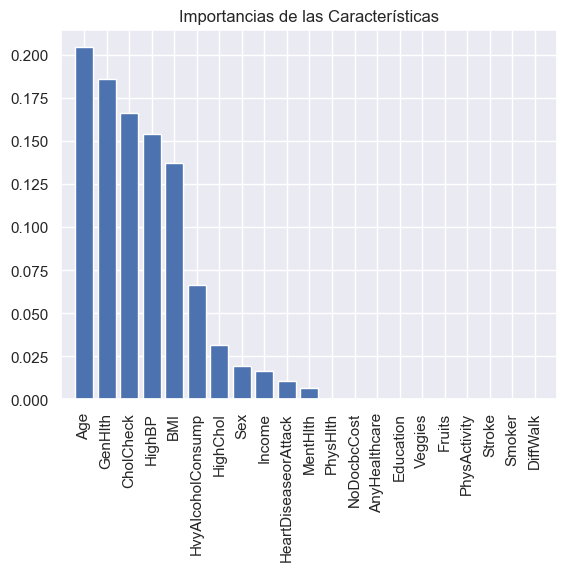

In [29]:
# Importancias de las características
importances_adaboost = adaboost_model.feature_importances_
indices = np.argsort(importances_adaboost)[::-1]

# Graficar las importancias de las características
plt.figure()
plt.title('Importancias de las Características')
plt.bar(range(X.shape[1]), importances_adaboost[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(X.columns)[indices],rotation=90,)
plt.xlim([-1, X.shape[1]])
plt.show()

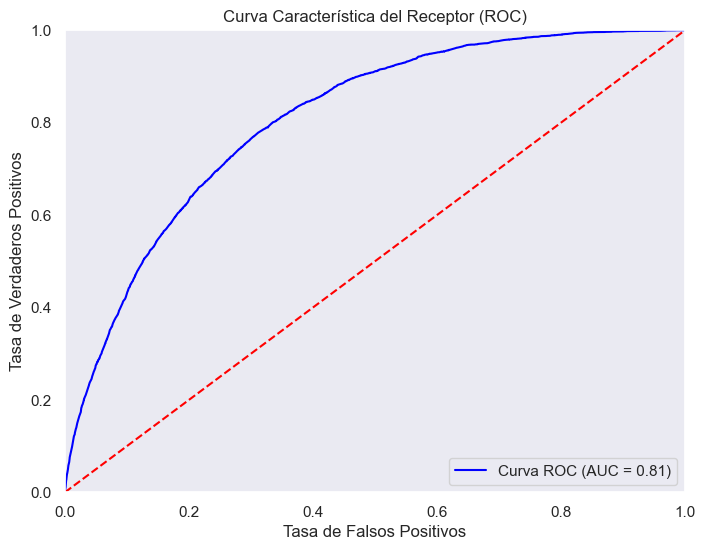

In [30]:
# Obtener las probabilidades predichas para la clase positiva
y_probs = adaboost_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calcular el AUC
roc_auc = roc_auc_score(y_test, y_probs)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva Característica del Receptor (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## XGBoost

              precision    recall  f1-score   support

       False       0.90      0.90      0.90     29439
        True       0.28      0.29      0.28      4249

    accuracy                           0.82     33688
   macro avg       0.59      0.59      0.59     33688
weighted avg       0.82      0.82      0.82     33688



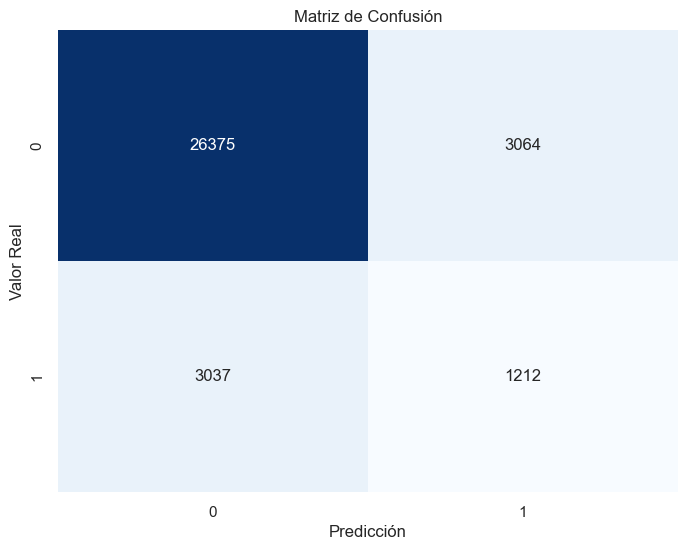

In [31]:
# Calcular el peso para la clase positiva
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Crear y ajustar el modelo de XGBoost
xgb_model = XGBClassifier(n_estimators=1000, max_depth=10, random_state=5555, scale_pos_weight=scale_pos_weight)
xgb_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_xgboost = xgb_model.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred_xgboost))

plt_conf_matrix(y_test,y_pred_xgboost)



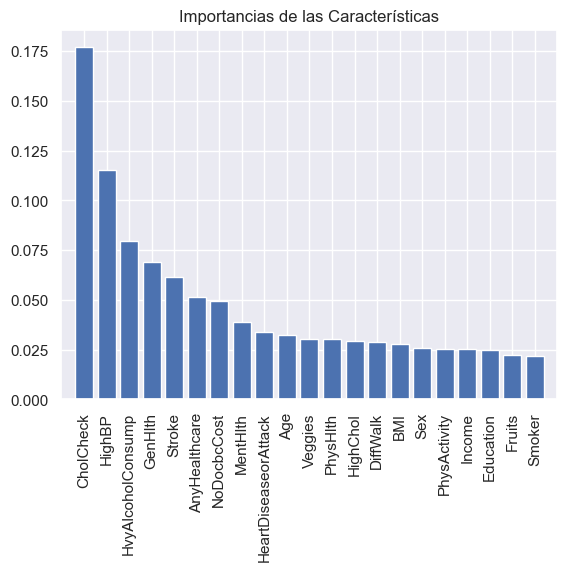

In [32]:
# Importancias de las características
importances_xgboost = xgb_model.feature_importances_
indices = np.argsort(importances_xgboost)[::-1]

# Graficar las importancias de las características
plt.figure()
plt.title('Importancias de las Características')
plt.bar(range(X.shape[1]), importances_xgboost[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(X.columns)[indices],rotation=90,)
plt.xlim([-1, X.shape[1]])
plt.show()

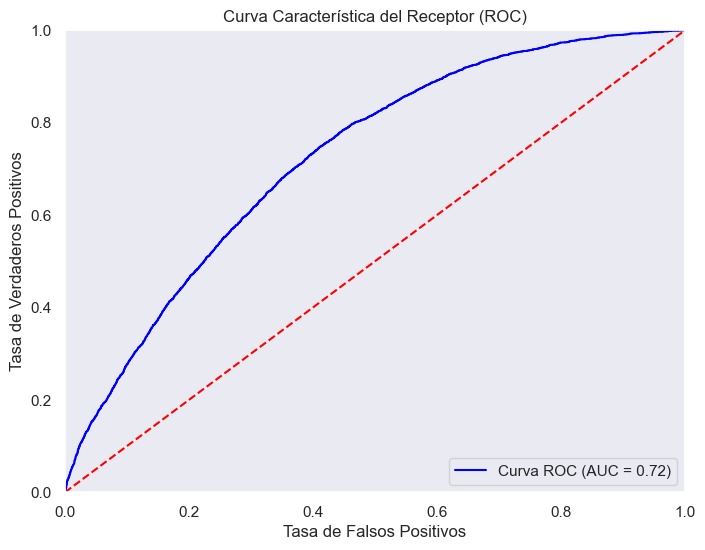

In [33]:
# Obtener las probabilidades predichas para la clase positiva
y_probs = xgb_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calcular el AUC
roc_auc = roc_auc_score(y_test, y_probs)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva Característica del Receptor (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()